In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Zip_Zhvi_AllHomes.csv') # ZHVI All Homes (SFR, Condo/Co-op) Time Series ($) with ZIP CODE resolution

In [3]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1134900.0,1118800,1108500,1110700,1128700,1174700,1236300,1281400,1290800,1282300
1,84654,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318100.0,318500,319600,321100,323100,324900,325600,325000,325600,327000
2,84616,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,415200.0,414700,415400,410700,400400,402400,411400,411800,412300,418200
3,93144,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,...,114600.0,115000,115000,114700,114600,114700,114500,114200,114100,113900
4,84640,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,200200.0,201700,203600,205000,204700,204200,204700,206700,209500,212000
5,91733,77084,Houston,TX,Houston,Harris,6,75600.0,75400.0,75100.0,...,158900.0,156900,154700,153600,154200,156800,158400,159400,160400,160400
6,97564,94109,San Francisco,CA,San Francisco,San Francisco,7,298200.0,295700.0,296400.0,...,1125700.0,1129000,1130700,1134300,1141500,1147300,1150500,1148100,1139600,1129800
7,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,8,NaN,NaN,NaN,...,304400.0,305600,307600,310000,312300,314400,315300,315100,316100,318700
8,62037,11226,New York,NY,New York,Kings,9,NaN,NaN,NaN,...,610900.0,611000,614200,625200,639700,649800,650700,646500,648100,653300
9,91940,77449,Cypress,TX,Houston,Harris,10,72100.0,72300.0,72100.0,...,161300.0,159000,156400,155300,156500,159500,161100,161800,162600,162700


In [4]:
df.shape

(15377, 265)

In [5]:
len(df.State.unique())

51

In [6]:
zipsPerState = pd.DataFrame(df['State'].groupby(df.State).count())
zipsPerState.sort_values(by='State', inplace=True)
zipsPerState.columns = ['number_of_zips']
zipsPerState.reset_index(inplace=True)

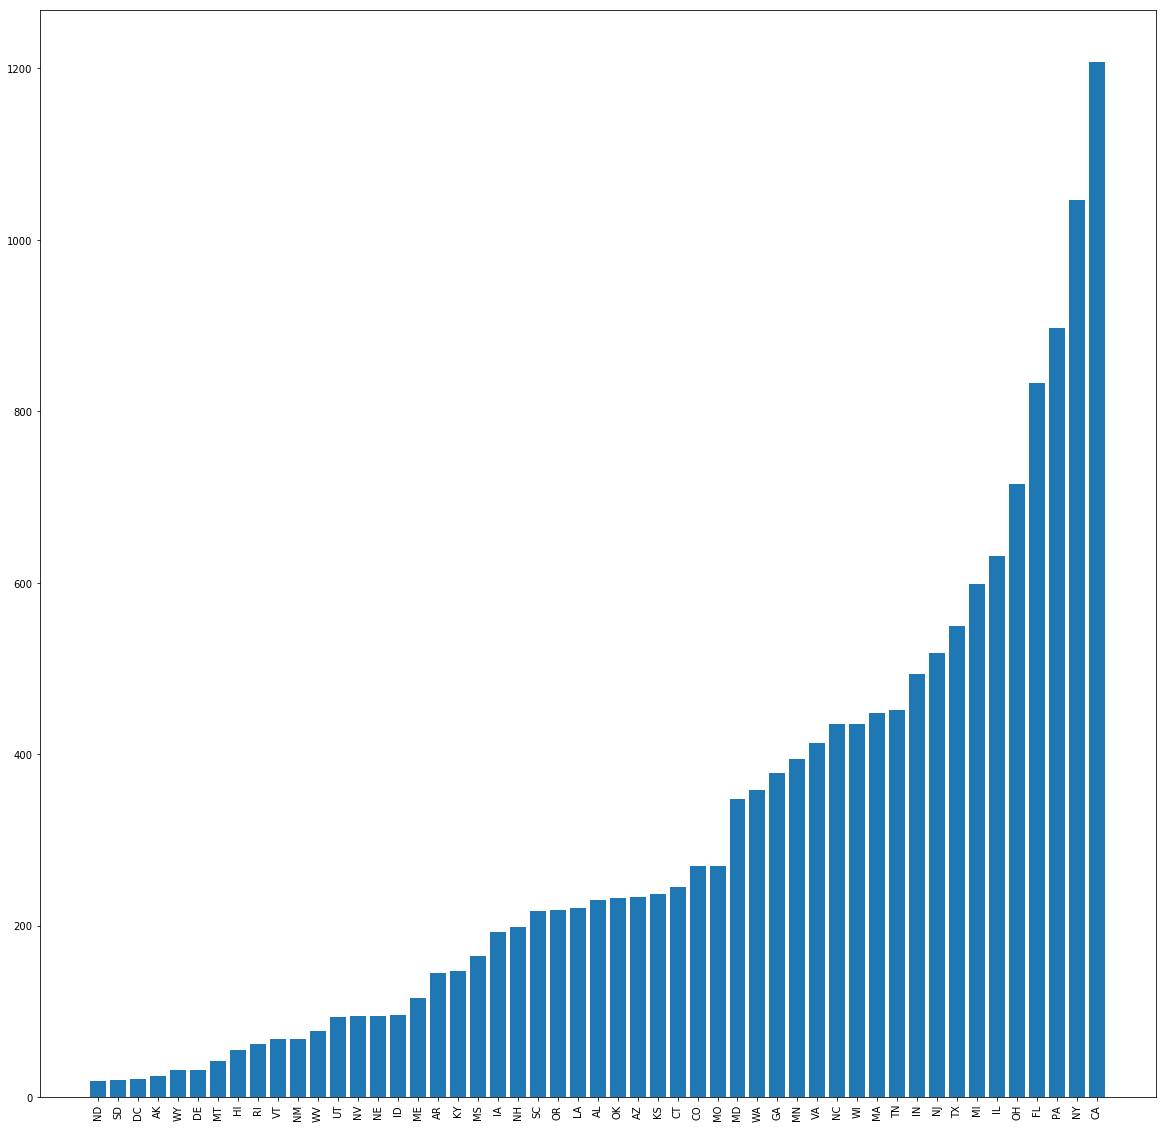

In [7]:
stateIds = [i for i in range(1, len(df.State.unique())+1) ]
plt.figure(figsize=(20,20))
plt.bar(stateIds, zipsPerState['number_of_zips'], align='center')
plt.xticks(stateIds, zipsPerState['State'], rotation='vertical')
plt.show()

In [8]:
dates = df.columns.tolist()[7:]

In [9]:
len(dates) # number of months

258

In [10]:
len(dates)/12 # number of years

21

In [11]:
dfTimeSeries = df[dates]

In [12]:
dfTimeSeries[dfTimeSeries.isnull().any(axis=1)].shape # 4841 rows - 1/3 of the data set contains at least one null record

(4841, 258)

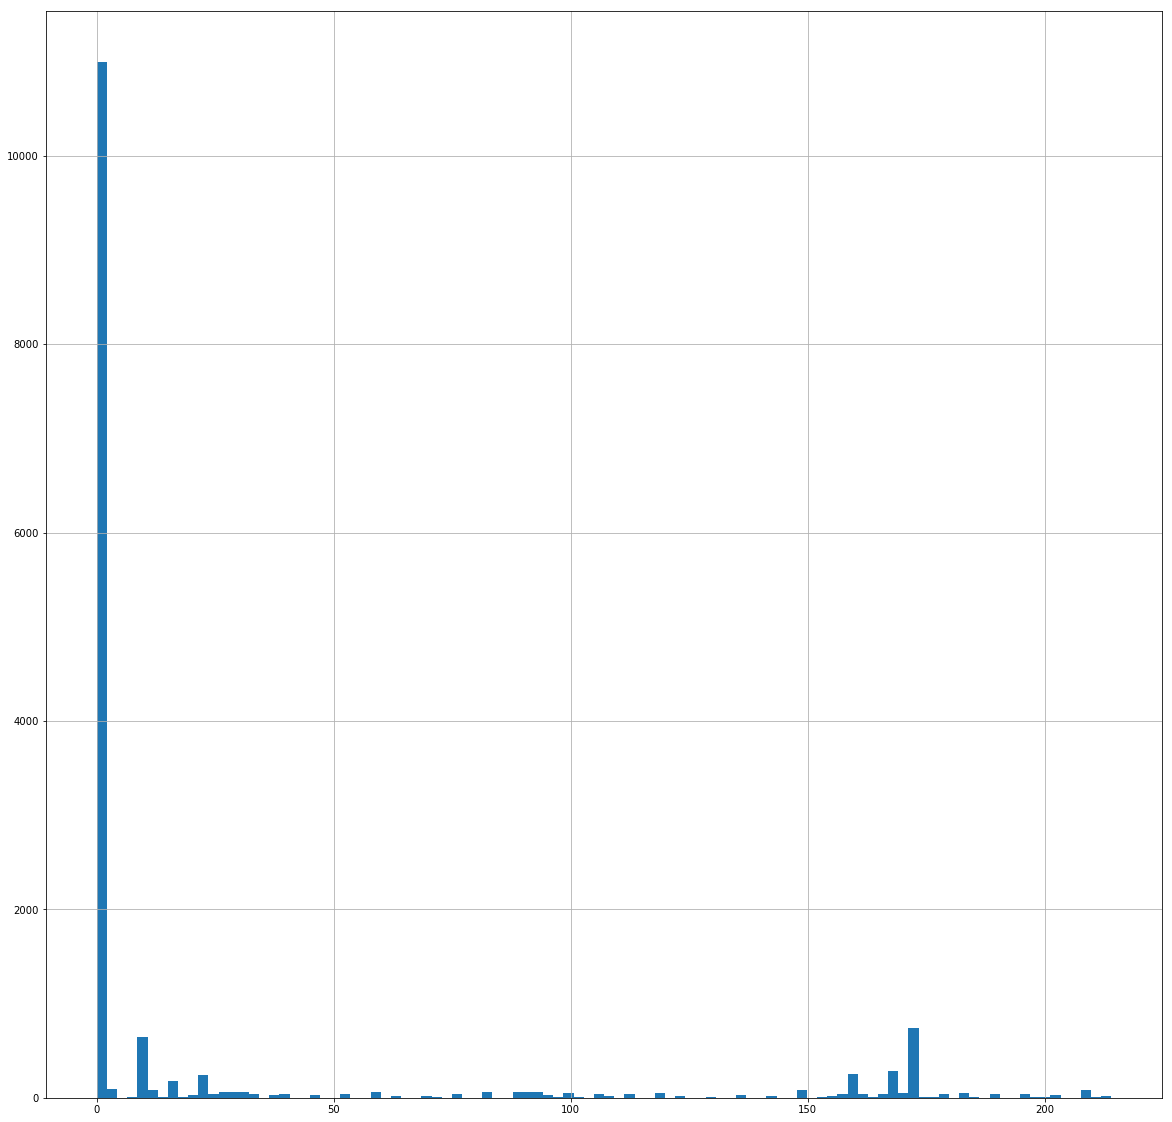

In [13]:
plt.figure(figsize=(20,20))
dfTimeSeries.isnull().sum(axis=1).hist(bins=100) # histogram of nan values contained in each row
# as we can see there are some rows for which 200 time spots are missing... (out of 258).
# but in general its not that bad as in a lot of rows are complete.

In [14]:
columns = dates + ['State']

In [15]:
seriesPerState = pd.DataFrame(df[columns].groupby(df.State).sum())

In [16]:
seriesPerState

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
State,,,,,,,,,,,,,,,,,,,,,
AK,482800.0,482800.0,482800.0,483000.0,483000.0,483000.0,483000.0,483000.0,483000.0,482800.0,...,6257700.0,6279300,6295500,6303200,6313600,6326000,6335800,6344600,6354000,6360700
AL,12557000.0,12508900.0,12508400.0,12506300.0,12479200.0,12444300.0,12426200.0,12440900.0,12481900.0,12511900.0,...,31306900.0,31441800,31522800,31626500,31758800,31874600,31951600,32022600,32124700,32223300
AR,9001800.0,9036700.0,9068400.0,9095900.0,9112800.0,9119800.0,9131100.0,9152100.0,9169800.0,9186500.0,...,18153100.0,18290700,18427800,18527800,18630900,18754600,18853900,18931800,18986300,19014300
AZ,24590800.0,24636600.0,24668500.0,24665900.0,24685500.0,24741100.0,24816000.0,24870700.0,24930300.0,25036300.0,...,55637000.0,55884500,56046800,56162000,56281700,56477500,56725500,56990100,57297300,57563600
CA,182052000.0,182127000.0,182112600.0,182131600.0,182265400.0,182525200.0,182884600.0,183373500.0,184076000.0,185180500.0,...,734023200.0,737650900,740525400,743410700,747039400,750940000,754556100,757925300,761396100,764155000
CO,27727600.0,27843400.0,27982100.0,28097700.0,28197600.0,28316400.0,28458100.0,28594600.0,28718800.0,28869500.0,...,89421000.0,89839100,90319000,90862200,91375600,91914600,92462700,92888700,93358400,93814500
CT,36213800.0,36353900.0,36456700.0,36498800.0,36513300.0,36524800.0,36536700.0,36585600.0,36675300.0,36807600.0,...,73590400.0,73597000,73700100,73807900,73726200,73608800,73599500,73690000,73870400,74062000
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12081100.0,12227800,12384000,12432500,12353700,12254600,12197900,12194300,12208300,12213100
DE,3057200.0,3051900.0,3055400.0,3060800.0,3063000.0,3065000.0,3066400.0,3067900.0,3068700.0,3069800.0,...,7211900.0,7221500,7237200,7281000,7346400,7374900,7346100,7308500,7286800,7263700


In [17]:
seriesPerState = seriesPerState.transpose()

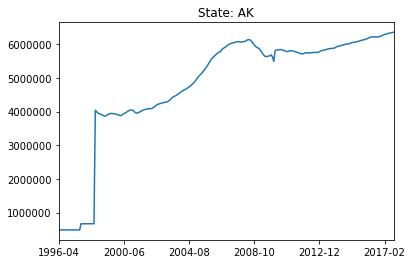

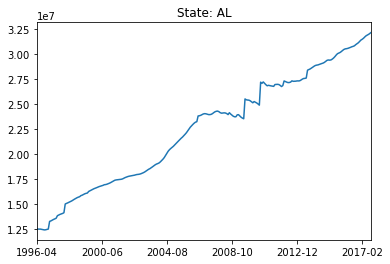

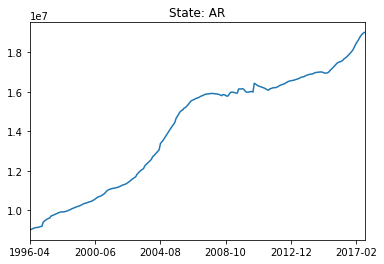

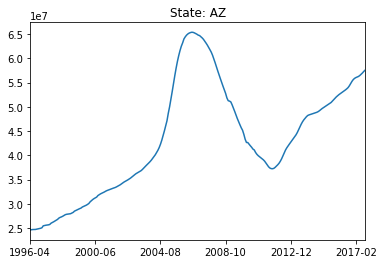

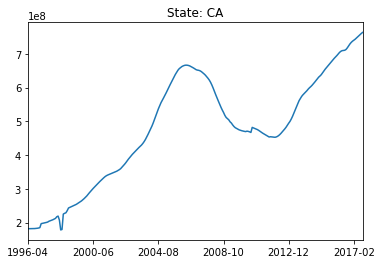

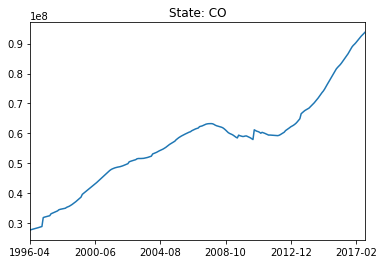

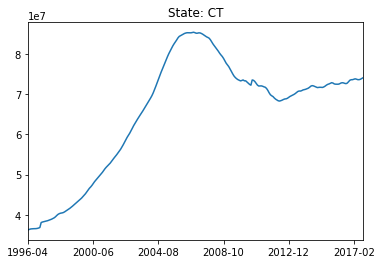

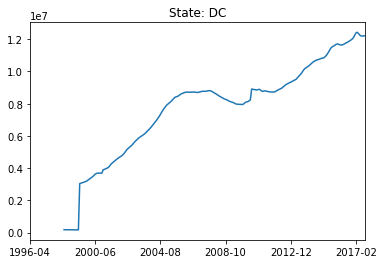

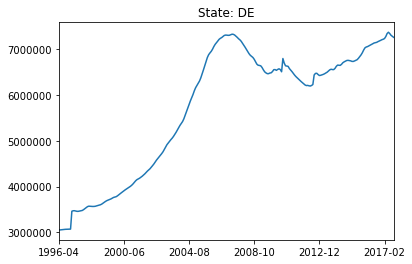

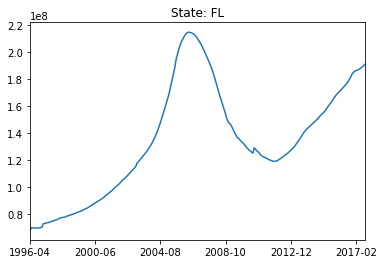

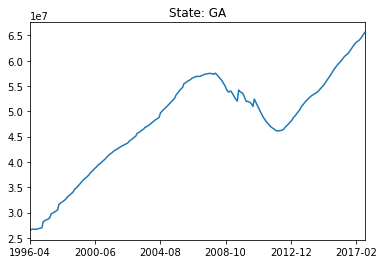

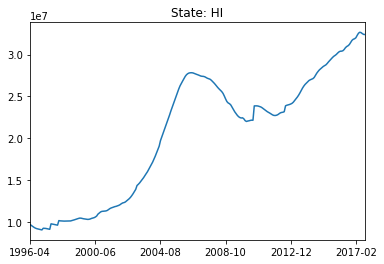

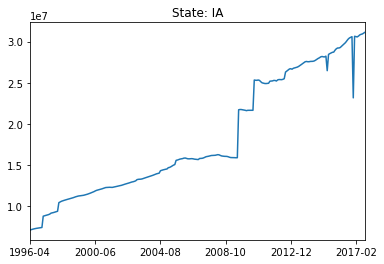

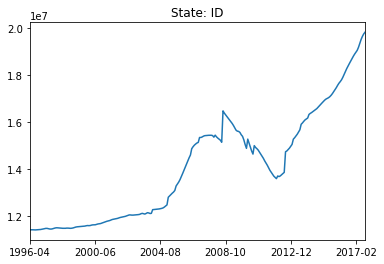

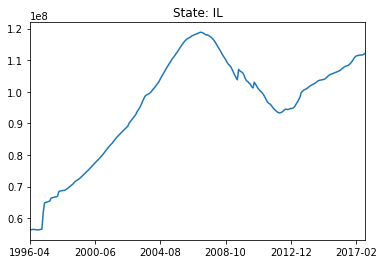

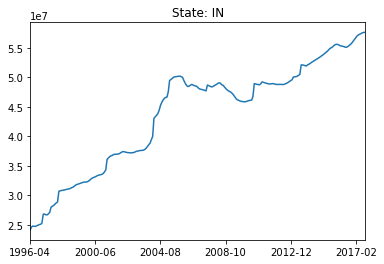

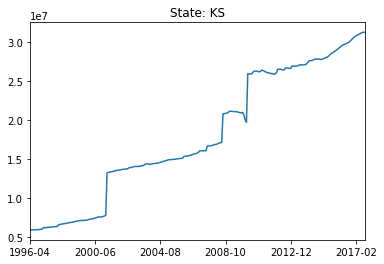

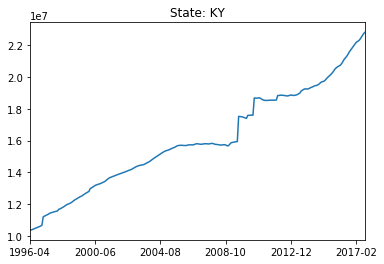

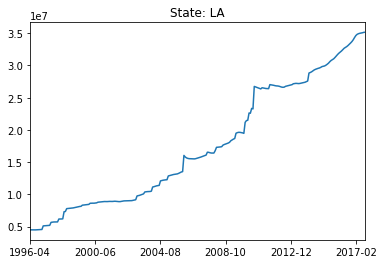

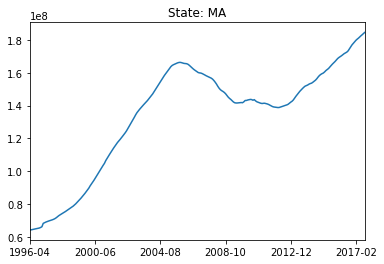

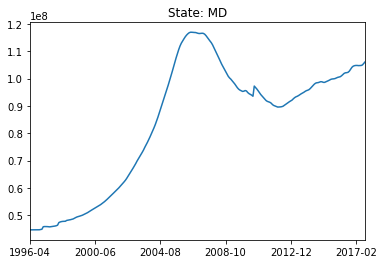

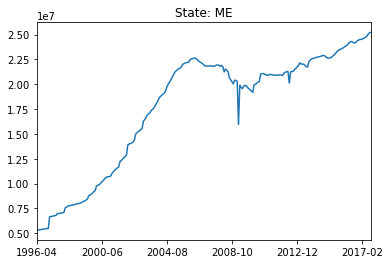

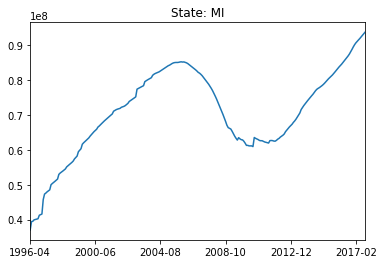

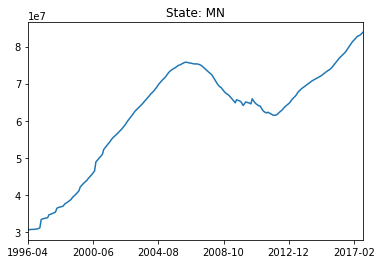

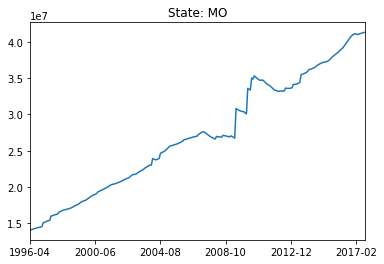

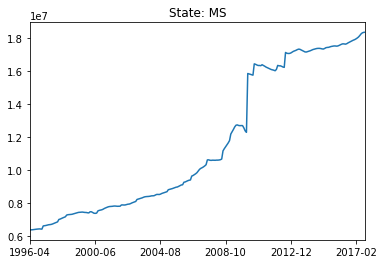

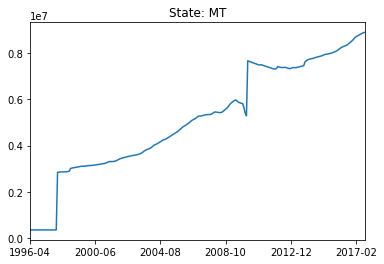

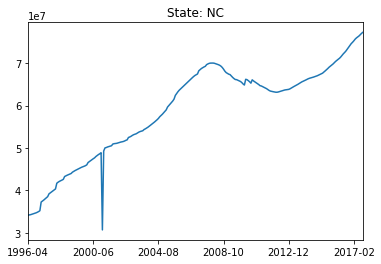

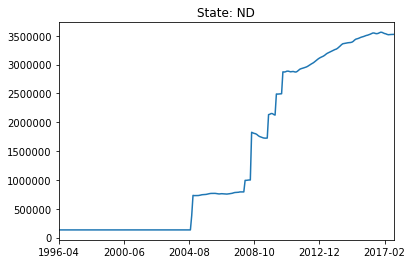

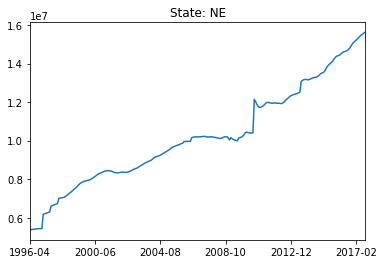

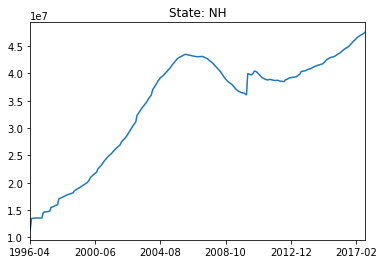

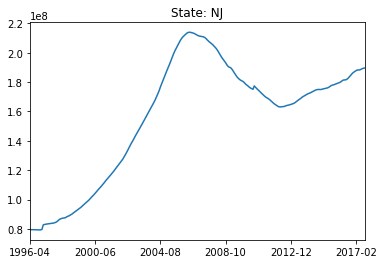

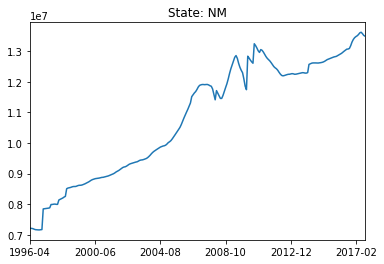

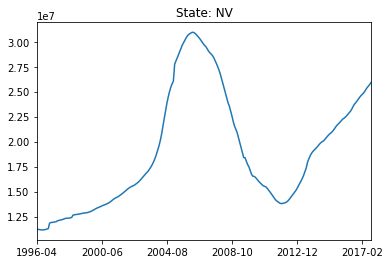

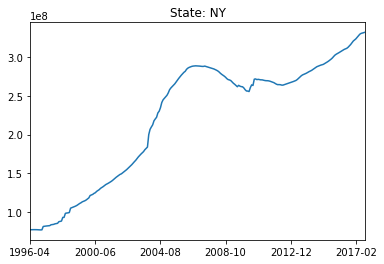

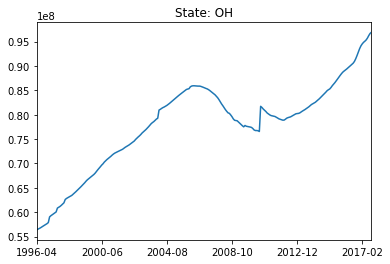

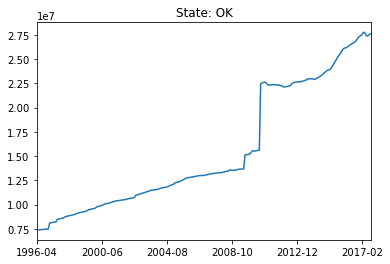

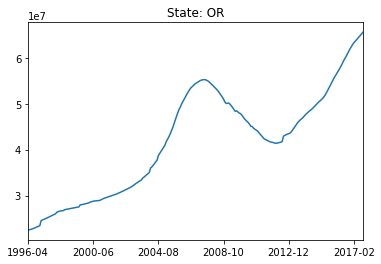

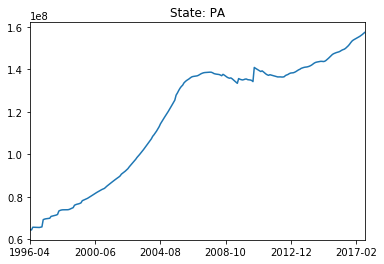

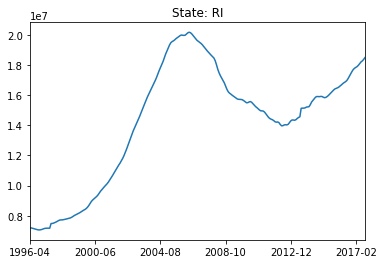

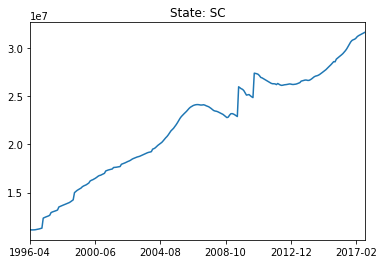

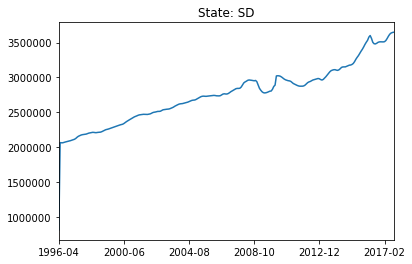

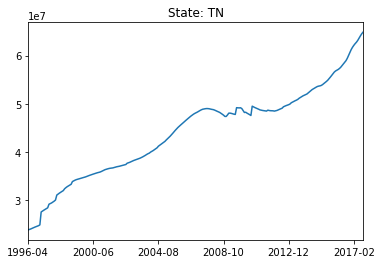

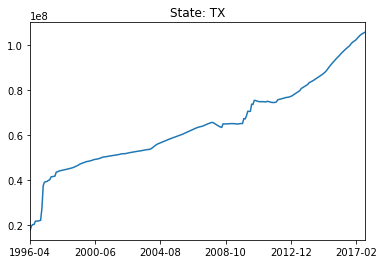

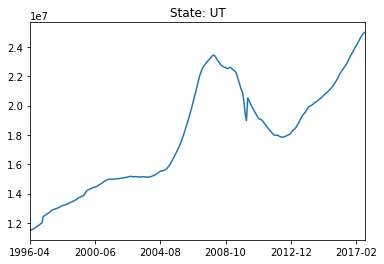

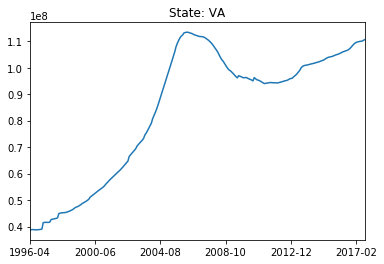

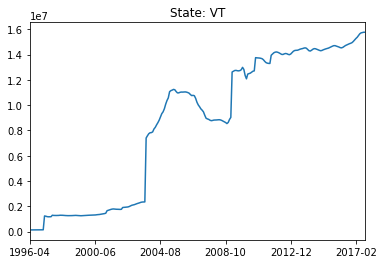

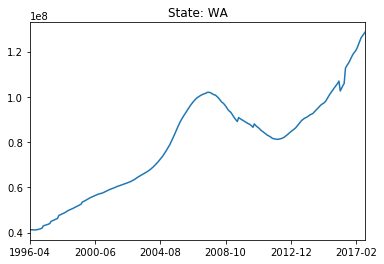

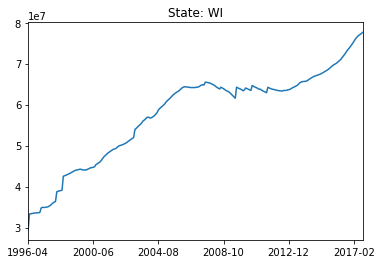

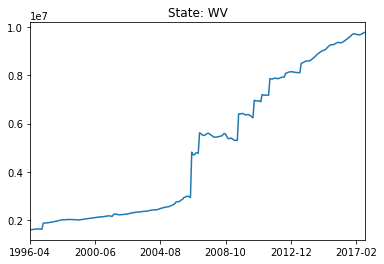

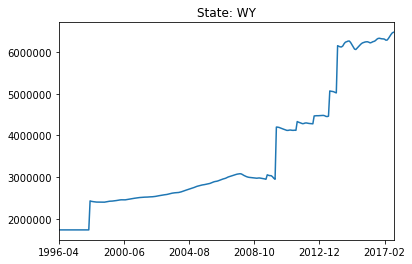

In [18]:
for state in seriesPerState.columns:
    plt.figure()
    plt.title('State: '+ state)
    seriesPerState[state].plot()
    plt.show()